In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [ ]:
fldr="/content/drive/MyDrive/UTKFace"

In [ ]:
import os
flies=os.listdir(fldr)

In [ ]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/UTKFace/25_1_1_20170113011522470.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170113180645637.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112230722548.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170114024700519.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170113005424686.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170114031711223.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112235103240.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170113011541030.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170114030227321.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170113001941650.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170114030648255.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112231543709.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112234214983.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112230445

In [ ]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

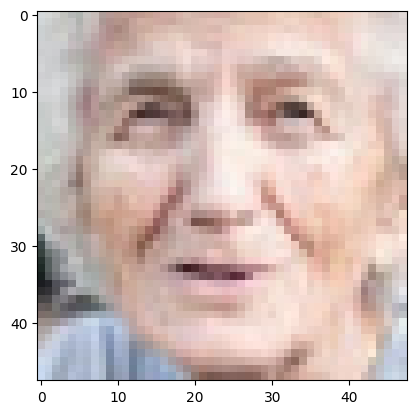

In [ ]:
plt.imshow(images[87])

In [ ]:
print(ages[87])

81


In [ ]:
print(genders[87])

1


In [ ]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [ ]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [ ]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12419 11317]


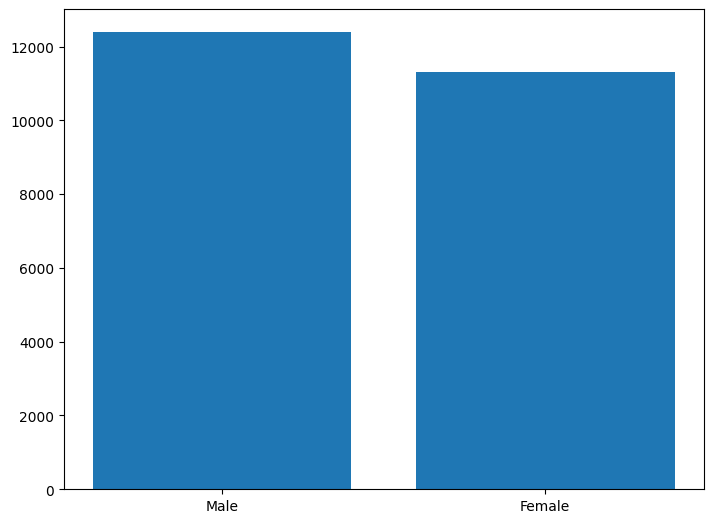

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [ ]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1133  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  257  158  262   98  284  346  395  426  859  734 2205  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
val=values.tolist()
cnt=counts.tolist()

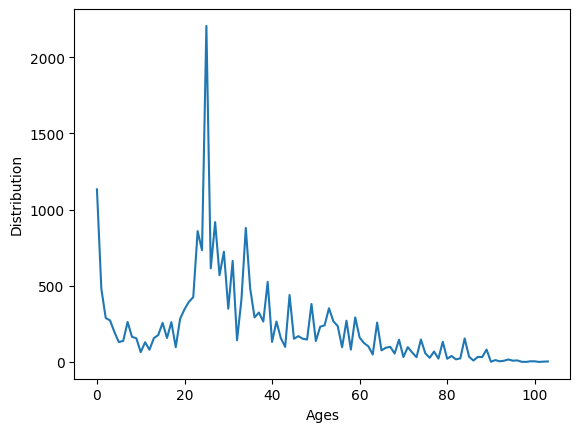

In [ ]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [ ]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [ ]:
images_f_2=images_f/255

In [ ]:
images_f_2.shape

(23736, 48, 48, 3)

In [ ]:
labels_f=np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [ ]:
Y_train[0:5]

array([[21,  1],
       [ 4,  1],
       [ 5,  1],
       [ 3,  1],
       [ 7,  0]])

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2[0][0:5]

array([1, 1, 1, 1, 0])

In [ ]:
Y_train_2[1][0:5]

array([21,  4,  5,  3,  7])

In [ ]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [ ]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy","accuracy"])
    return model

In [ ]:
Model=model((48,48,3))

In [ ]:
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 48, 48, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 48, 48, 32)     │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 48, 48, 32)     │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 24, 24, 32)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 24, 24, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 24, 24, 64)     │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 24, 24, 64)     │              0 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 12, 12, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 12, 12, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 12, 12, 128)    │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 12, 12, 128)    │              0 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 6, 6, 128)      │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 6, 6, 256)      │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 6, 6, 256)      │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 6, 6, 256)      │              0 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 3, 3, 256)      │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)    

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fle_s='Age_sex_detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=100,callbacks=callback_list)

Epoch 1/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - age_out_accuracy: 0.0460 - age_out_loss: 18.2406 - loss: 19.1437 - sex_out_accuracy: 0.5269 - sex_out_loss: 0.7126
Epoch 1: val_loss improved from inf to 16.15495, saving model to Age_sex_detection.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - age_out_accuracy: 0.0460 - age_out_loss: 18.2336 - loss: 19.1365 - sex_out_accuracy: 0.5269 - sex_out_loss: 0.7125 - val_age_out_accuracy: 0.0452 - val_age_out_loss: 15.3239 - val_loss: 16.1550 - val_sex_out_accuracy: 0.5379 - val_sex_out_loss: 0.6873
Epoch 2/100
275/279 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - age_out_accuracy: 0.0492 - age_out_loss: 14.7683 - loss: 15.5804 - sex_out_accuracy: 0.5629 - sex_out_loss: 0.6764
Epoch 2: val_loss improved from 16.15495 to 13.26287, saving model to Age_sex_detection.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - age_out_accuracy: 0.0491 - age_out_loss: 14.7573 - loss: 15.5692 - sex_out_accuracy: 0.5637 - sex_out_loss: 0.6760 - val_age_out_accur

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - age_out_accuracy: 0.0458 - age_out_loss: 6.3721 - loss: 7.4334 - sex_out_accuracy: 0.8808 - sex_out_loss: 0.2694


[7.525866508483887,
 0.263581246137619,
 6.475016117095947,
 0.045163463801145554,
 0.8859117031097412]

In [ ]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
pred[1]

array([[ 1.8178279],
       [38.545143 ],
       [23.714024 ],
       ...,
       [25.191853 ],
       [33.037    ],
       [27.696602 ]], dtype=float32)

In [ ]:
pred[0]

array([[0.8716142 ],
       [0.03577314],
       [0.9986437 ],
       ...,
       [0.8423872 ],
       [0.2099397 ],
       [0.00270247]], dtype=float32)

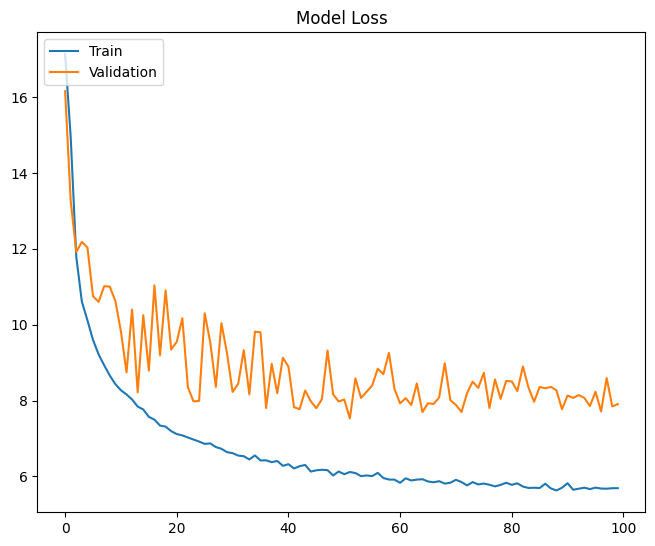

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

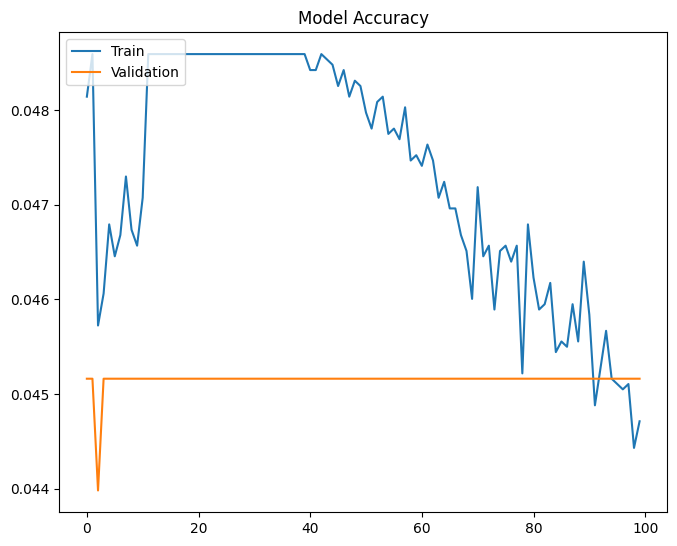

In [ ]:
plt.plot(History.history['age_out_accuracy'])
plt.plot(History.history['val_age_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [ ]:
from sklearn.metrics import r2_score

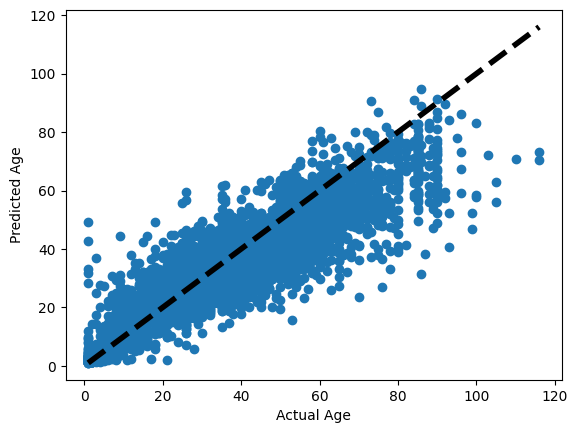

AGE_Accuracy: 0.783


In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()
# printing age accuracy
print('AGE_Accuracy: %.3f' % r2_score(Y_test_2[1], pred[1]))


In [ ]:
i=0
Pred_l=[]
while(i<len(pred[1])):
    Pred_l.append(int(np.round(pred[1][i])))
    i=i+1

<ipython-input-45-dd768d8db15c>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[1][i])))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[1],Pred_l)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
print(report)

              precision    recall  f1-score   support

           1       0.86      0.25      0.39       268
           2       0.28      0.71      0.40       130
           3       0.22      0.19      0.21        77
           4       0.26      0.20      0.23        59
           5       0.22      0.19      0.20        58
           6       0.07      0.10      0.08        30
           7       0.06      0.11      0.07        28
           8       0.15      0.13      0.14        71
           9       0.09      0.06      0.07        51
          10       0.13      0.11      0.12        38
          11       0.04      0.05      0.04        20
          12       0.12      0.07      0.09        44
          13       0.13      0.12      0.13        24
          14       0.08      0.04      0.06        45
          15       0.12      0.06      0.08        48
          16       0.10      0.05      0.06        64
          17       0.05      0.04      0.05        47
          18       0.03    

In [ ]:
results=confusion_matrix(Y_test_2[1],Pred_l)

In [ ]:
pip install seaborn

<Axes: >

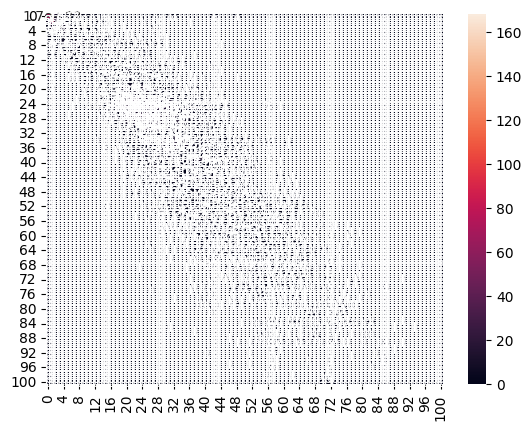

In [ ]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
Predicted Age is 71
Predicted Gender is Male


<ipython-input-52-f6b4345c0bcd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-52-f6b4345c0bcd>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


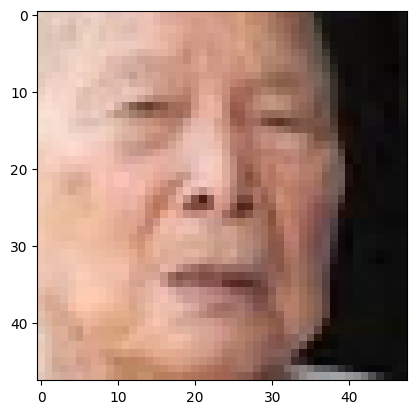

In [ ]:
test_image(4,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Age is 77
Predicted Gender is Female


<ipython-input-52-f6b4345c0bcd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-52-f6b4345c0bcd>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


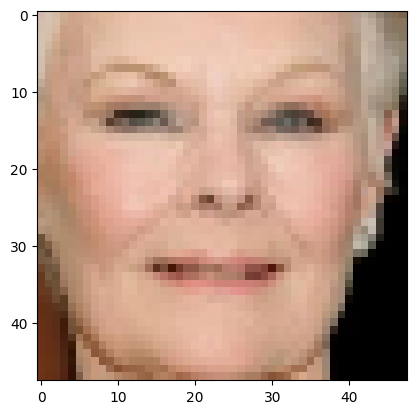

In [ ]:
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Age is 7
Predicted Gender is Female


<ipython-input-52-f6b4345c0bcd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-52-f6b4345c0bcd>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


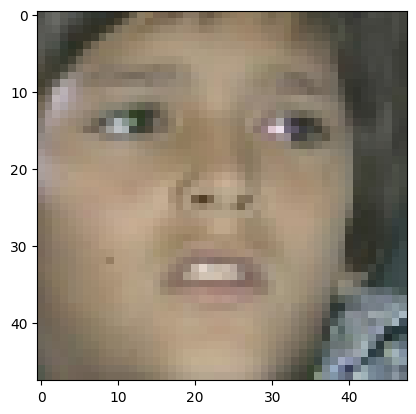

In [ ]:
test_image(458,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Age is 7
Predicted Gender is Female


<ipython-input-52-f6b4345c0bcd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
<ipython-input-52-f6b4345c0bcd>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


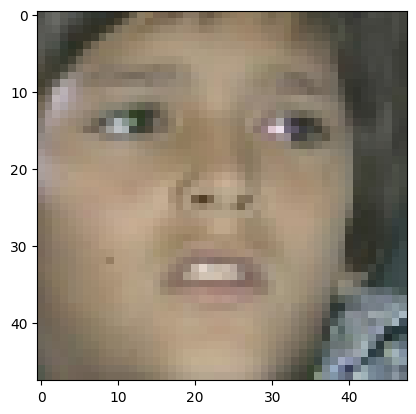

In [ ]:
test_image(458,images_f,images_f_2,Model)